**Task 4.4 Supervised Learning - Classification and hyperparameter tuning**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cox2.csv")
print(df.columns)
print(df.head())

Index(['QikProp_.stars', 'QikProp_.amine', 'QikProp_.acid', 'QikProp_.rotor',
       'QikProp_.rctvFG', 'QikProp_CNS', 'QikProp_MW', 'QikProp_dipole',
       'QikProp_SASA', 'QikProp_FOSA',
       ...
       'moe2D_vsa_acc', 'moe2D_vsa_don', 'moe2D_vsa_hyd', 'moe2D_vsa_other',
       'moe2D_vsa_pol', 'moe2D_weinerPath', 'moe2D_weinerPol', 'moe2D_zagreb',
       'IC50', 'cox2Class'],
      dtype='object', length=257)
   QikProp_.stars  QikProp_.amine  QikProp_.acid  QikProp_.rotor  \
0               1               0              0               1   
1               0               0              0               2   
2               0               0              0               3   
3               1               0              0               2   
4               1               0              0               2   

   QikProp_.rctvFG  QikProp_CNS  QikProp_MW  QikProp_dipole  QikProp_SASA  \
0                0            0     358.882           7.645       635.022   
1                

**Zielvariable und Features definieren**

In [6]:
X = df.drop(columns=['cox2Class'])
y = df['cox2Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train-Test-Split (75/25)**

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

**RandomForestClassifier + GridSearchCV**

In [8]:
clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

**Bestes Modell**

In [9]:
best_clf = grid_search.best_estimator_
print("Beste Hyperparameter:", grid_search.best_params_)

Beste Hyperparameter: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


**Cross Validation**

In [10]:
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=10, scoring='accuracy')
print("10-fold CV Accuracy Scores:", cv_scores)
print("Durchschnittliche Accuracy:", cv_scores.mean())

10-fold CV Accuracy Scores: [0.97142857 1.         0.94285714 0.94285714 0.91428571 1.
 0.97058824 0.97058824 1.         1.        ]
Durchschnittliche Accuracy: 0.9712605042016806


**Testdaten vorhersagen**

In [11]:
y_pred = best_clf.predict(X_test)

**Modell evaluieren**

In [12]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9482758620689655
Confusion Matrix:
 [[23  3]
 [ 3 87]]
Classification Report:
               precision    recall  f1-score   support

      Active       0.88      0.88      0.88        26
    Inactive       0.97      0.97      0.97        90

    accuracy                           0.95       116
   macro avg       0.93      0.93      0.93       116
weighted avg       0.95      0.95      0.95       116



•	TP (True Positive): 23 aktive Moleküle korrekt erkannt

•	FN (False Negative): 3 aktive Moleküle fälschlich als inaktiv klassifiziert

•	FP (False Positive): 3 inaktive Moleküle fälschlich als aktiv klassifiziert

•	TN (True Negative): 87 inaktive korrekt erkannt

Active: 88 % der als aktiv klassifizierten Moleküle sind korrekt (Precision), und 88 % aller echten Aktiven wurden gefunden (Recall)

Interaktiv: Sehr hohe Erkennungsrate für inaktive Moleküle


**Feature Importances**

Top 10 wichtigste Merkmale:
IC50                 0.286577
QikProp_QPlogKhsa    0.021812
QikProp_QPlogS       0.019796
QikProp_accptHB      0.016268
QikProp_QPPMDCK      0.014129
QikProp_QPlogPo.w    0.013535
QikProp_IP.eV.       0.011804
QikProp_QPPCaco      0.010513
moe2D_SlogP          0.010419
moe2D_logS           0.010385
dtype: float64


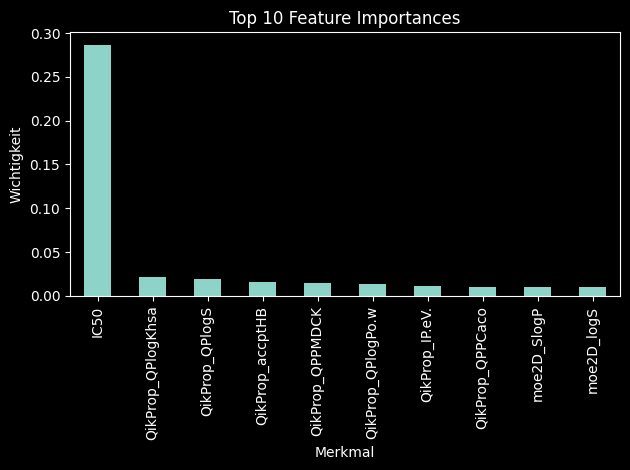

In [13]:
importances = pd.Series(best_clf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
print("Top 10 wichtigste Merkmale:")
print(importances_sorted.head(10))

importances_sorted.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.ylabel("Wichtigkeit")
plt.xlabel("Merkmal")
plt.tight_layout()
plt.show()